# **Play store app review Analysis**    -



*The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.*

# **Problem Statement**


*The Google Play Store hosts millions of apps, each competing for user attention and engagement. Understanding the factors that contribute to an app's success is crucial for developers aiming to optimize their offerings and gain a competitive edge. This project aims to analyze Play Store app data, including attributes such as category, rating, size, and user reviews, to identify key drivers of app engagement and success. By leveraging data exploration and analysis techniques, we seek to uncover actionable insights that can guide developers in enhancing app performance, improving user experience, and making data-driven business decisions in the Android app market.*

# **Objective?**

*To provide app developers with data-driven insights on key success factors in the Google Play Store, enabling them to optimize app performance, enhance user engagement, and make informed business decisions for greater market success.*

### Import Libraries

In [476]:
#importing all require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [743]:
warnings.filterwarnings("ignore")

%matplotlib inline

### Dataset Loading

In [746]:
# Loading  Datase
playstore_data = pd.read_csv(r"C:\Users\RajakHem\Desktop\Power BI project\My Python Project\Play Store App Review Analysis\Play Store Data.csv")
userReview_data=pd.read_csv(r"C:\Users\RajakHem\Desktop\Power BI project\My Python Project\Play Store App Review Analysis\User Reviews.csv")

In [748]:
# Dataset First Look
playstore_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [750]:
userReview_data.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


### Dataset Rows & Columns count

In [752]:
# Dataset Rows & Columns count
playstore_data.shape


(10841, 13)

In [754]:
userReview_data.shape

(64295, 5)

### Dataset Information

In [756]:
playstore_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [758]:
userReview_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37432.0,0.182146,0.351301,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37432.0,0.492704,0.259949,0.0,0.357143,0.514286,0.65,1.0


#### Duplicate Values

In [760]:
# Dataset Duplicate Value Count
print(playstore_data["App"].value_counts()) 


App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64


In [762]:
# Count duplicate value
column_duplicate_count = playstore_data.duplicated().sum()
print(column_duplicate_count)

483


In [764]:
# Drop duplicate value
playstore_data.drop_duplicates(inplace=True)

In [766]:
playstore_data.shape

(10358, 13)

#### Missing Values/Null Values

In [768]:
# Missing Values/Null Values Count
playstore_data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

In [770]:
# Null Values Count
NullValue=playstore_data.isnull().sum()
print(NullValue)

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


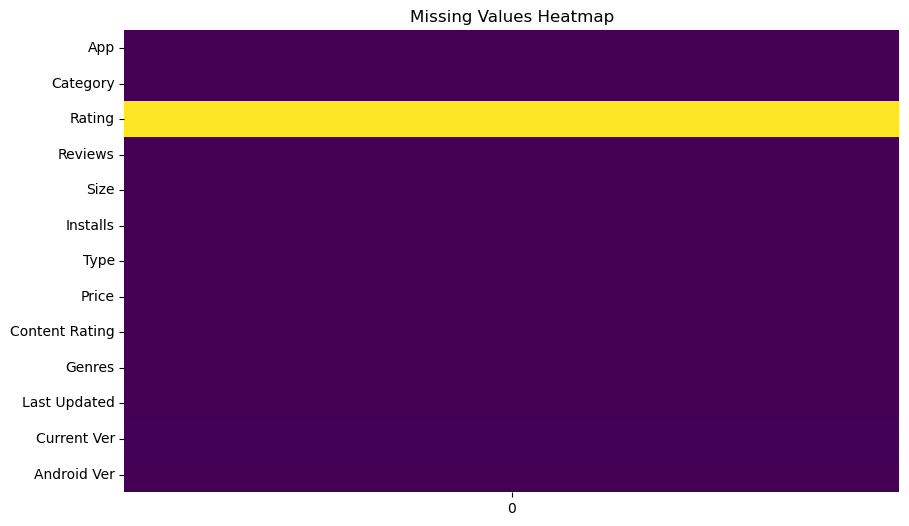

In [772]:
# Visualizing the missing values
NullValue = pd.DataFrame(NullValue)
plt.figure(figsize=(10, 6))
sns.heatmap(NullValue, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [774]:
# replace missing value by each category mean
category_avg_rating = playstore_data.groupby('Category')['Rating'].transform('mean')
print(category_avg_rating)

0        4.358065
1        4.358065
2        4.358065
3        4.358065
4        4.358065
           ...   
10836    4.191153
10837    4.191153
10838    4.182450
10839    4.347458
10840    4.096066
Name: Rating, Length: 10358, dtype: float64


In [776]:
playstore_data['Rating'] = playstore_data['Rating'].fillna(category_avg_rating)

In [778]:
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

# ***Dataset Information***

Dataset 1: playstore_data
This dataset provides metadata about apps listed on the Google Play Store. The columns are:
* App - Name of the application.
* Category - The category under which the app is listed (e.g., Game, Productivity, Health).
* Rating - Average user rating of the app (on a scale of 0-5).
* Reviews - Number of user reviews the app has received.
* Size - Size of the app (in MB or marked as "Varies with device").
* Installs - Number of times the app has been installed (e.g., 10,000+, 1,000,000+).
* Type - Whether the app is Free or Paid.
* Price - Cost of the app (if paid, otherwise 0 for free apps).
* Content Rating - Age group suitability (e.g., Everyone, Teen, Adults).
* Genres - Genres associated with the app (e.g., Action, Puzzle, Social).
* Last Updated - The last update date of the app.
* Current Ver - The latest version number of the app.
* Android Ver - The minimum Android version required to install the app.

Dataset 2: userReview_data
* This dataset contains user-generated reviews along with sentiment analysis results. The columns are:
* App - Name of the application (to link with playstore_data).
* Translated_Review - User review text, translated into English.
* Sentiment - Overall sentiment of the review (Positive, Neutral, Negative).
* Sentiment_Polarity - A numerical score indicating sentiment strength (-1 for negative, 1 for positive, and 0 for neutral).
* Sentiment_Subjectivity - A numerical score indicating how opinion-based a review is (0 = factual, 1 = highly subjective).

# ***Understanding Your Variables***

In [795]:
# Dataset Columns
print(playstore_data.columns.tolist())
print(userReview_data.columns.tolist())

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [797]:
# Dataset Describe
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Check Unique Values for each variable.

In [509]:
# Check Unique Values for each variable.
playstore_data.nunique()

App               9660
Category            34
Rating              71
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

In [512]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Total app Category wise

In [517]:
category_counts = playstore_data['Category'].value_counts()
print(category_counts)

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64


In [518]:
# Category to delete
category_to_remove = '1.9'

playstore_data = playstore_data[playstore_data['Category'] != category_to_remove]

playstore_data['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# ***1)Average rating of apps in different categories***

In [801]:
# Calculate average rating for each category
category_avg_rating = playstore_data.groupby('Category')['Rating'].mean().reset_index()

# Rename columns for clarity
category_avg_rating.columns = ['Category', 'Average Rating']
category_avg_rating = category_avg_rating.sort_values(by='Average Rating', ascending=False)

# Display the result
print(category_avg_rating)


               Category  Average Rating
0                   1.9       19.000000
11               EVENTS        4.435556
9             EDUCATION        4.375969
1        ART_AND_DESIGN        4.358065
4   BOOKS_AND_REFERENCE        4.347458
24      PERSONALIZATION        4.333871
23            PARENTING        4.300000
15                 GAME        4.281285
3                BEAUTY        4.278571
16   HEALTH_AND_FITNESS        4.261450
28               SOCIAL        4.254918
27             SHOPPING        4.251485
33              WEATHER        4.244000
29               SPORTS        4.225175
26         PRODUCTIVITY        4.201796
12               FAMILY        4.191153
2     AUTO_AND_VEHICLES        4.190411
25          PHOTOGRAPHY        4.182895
21              MEDICAL        4.182450
18   LIBRARIES_AND_DEMO        4.178462
17       HOUSE_AND_HOME        4.164706
14       FOOD_AND_DRINK        4.164151
6                COMICS        4.155172
7         COMMUNICATION        4.151466


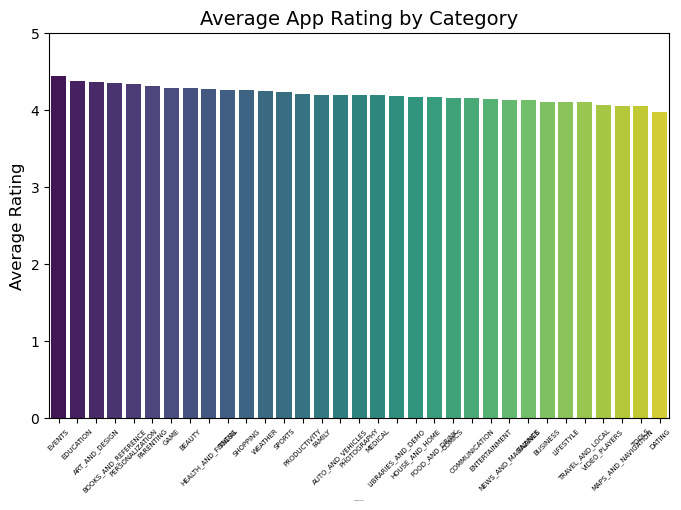

In [520]:
# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Average Rating', data=category_avg_rating, palette='viridis')

# Customize the chart
plt.xlabel('App Category', fontsize=1)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average App Rating by Category', fontsize=14)
plt.xticks(rotation=45,fontsize=5)  # Rotate category labels if needed
plt.ylim(0, 5)  # Set y-axis limit

# Show the plot
plt.show()

# ***Insights***

Top-Rated App Categories:
* Highest Ratings: EVENTS (4.44) and EDUCATION (4.38) show strong user satisfaction.
* Other High Ratings: ART_AND_DESIGN (4.36), BOOKS_AND_REFERENCE (4.35), and PERSONALIZATION (4.33) indicate a good user experience.

Mid-Rated Categories:
* Moderate Satisfaction: GAME (4.28) and HEALTH_AND_FITNESS (4.26) show good engagement but some complaints.
* Slightly Lower Ratings: PRODUCTIVITY (4.20) and FAMILY (4.19) apps may need improvements.

Lower-Rated Categories:
* Lowest Rating: DATING (3.97), possibly due to issues like fake profiles or pricing concerns.
* Other Low Ratings: TOOLS (4.05), MAPS_AND_NAVIGATION (4.05), and VIDEO_PLAYERS (4.06) may face performance issues.

Relatively Low Ratings: FINANCE (4.13) and BUSINESS (4.10) could struggle with complexity or security concerns.

General Trends:
* Utility and productivity apps tend to have lower ratings due to high user expectations.
* Creative and leisure-focused apps receive better ratings for their engaging experience.
* Health, lifestyle, and finance apps fall in the mid-range, possibly due to usability or trust concerns.

# ***Insights help creating a positive business impact?***

* Targeted App Development: Developers can focus on creating or improving apps in these high-rated categories, ensuring they meet user expectations and maintain quality.
* Investment and Marketing: Businesses can allocate more resources to promoting apps in these categories, as they have higher user satisfaction, which can drive better engagement and retention.
* Monetization Strategy: Higher-rated categories indicate strong user trust, making them ideal for in-app purchases, subscriptions, or ad placements.

# ***2)Ratings vary across free vs paid apps***

In [817]:
avg_ratings = pd.DataFrame(playstore_data.groupby('Type')['Rating'].mean()).reset_index()
print(avg_ratings)

   Type     Rating
0     0  19.000000
1  Free   4.181239
2  Paid   4.250829


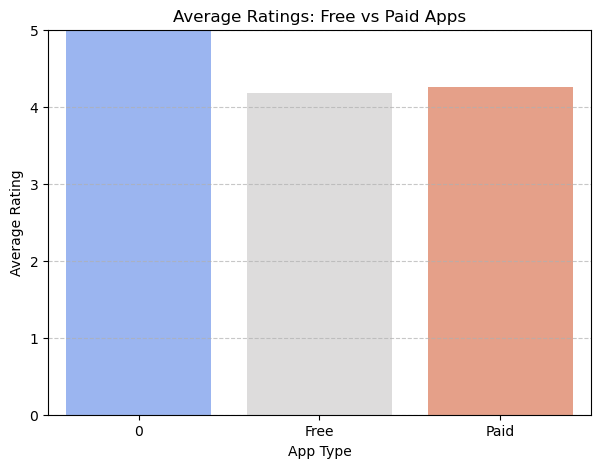

In [967]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Type", y="Rating", data=avg_ratings, palette="coolwarm")
plt.title("Average Ratings: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ***Insights***

* Simple and Clear Comparison:Although the difference in average ratings between free and paid apps is not significant, a bar chart helps visually confirm this insight.
* Quickly Identifies Trends:Even when differences are small, a bar chart allows us to observe whether free or paid apps tend to have slightly better ratings.
* Better for Aggregated Data:Since we are focusing on average ratings, a bar chart provides a clear summary without overcomplicating the analysis.
* Confirms No Major Difference:The chart helps validate that there isn’t a significant variation between free and paid apps, reinforcing our findings.

# ***Insights help creating a positive business impact?***

* Understanding User Perception:Even though the rating difference between free and paid apps is minimal, this insight helps businesses understand that pricing alone may not be a major factor in user satisfaction.
* Improving Monetization Strategies:If paid apps do not show a significantly higher rating than free apps, businesses may need to enhance premium features to justify the cost.Alternatively, businesses can explore freemium models with value-added services.
* Product Development Focus:Since ratings are similar for both free and paid versions, developers should focus on feature quality, usability, and customer support rather than pricing alone.
* Marketing and Positioning:The insights can help refine marketing strategies, ensuring that the value proposition for both free and paid users is clear and compelling.
* Competitive Advantage:Businesses can compare these insights with competitors to identify areas where they can differentiate their offerings and enhance user engagement.

# ***3)How does the number of installs correlate with app ratings?***

In [834]:
playstore_data['Number_of_Downloads'] = pd.Categorical(playstore_data['Installs'],ordered=True)

avg_rating_per_download = playstore_data.groupby('Installs')['Rating'].mean().reset_index()
avg_rating_per_download['Rating'] = avg_rating_per_download['Rating'].round(2)
avg_rating_per_download = avg_rating_per_download.sort_values(by='Rating', ascending=False)
print(avg_rating_per_download)


          Installs  Rating
21            Free   19.00
11    100,000,000+    4.41
20    500,000,000+    4.35
17     50,000,000+    4.35
8      10,000,000+    4.31
5   1,000,000,000+    4.26
6              10+    4.26
9             100+    4.25
14      5,000,000+    4.24
15             50+    4.23
2               1+    4.22
12              5+    4.22
4       1,000,000+    4.22
1               0+    4.19
0                0    4.19
18            500+    4.17
19        500,000+    4.17
10        100,000+    4.12
3           1,000+    4.09
16         50,000+    4.05
7          10,000+    4.04
13          5,000+    4.03


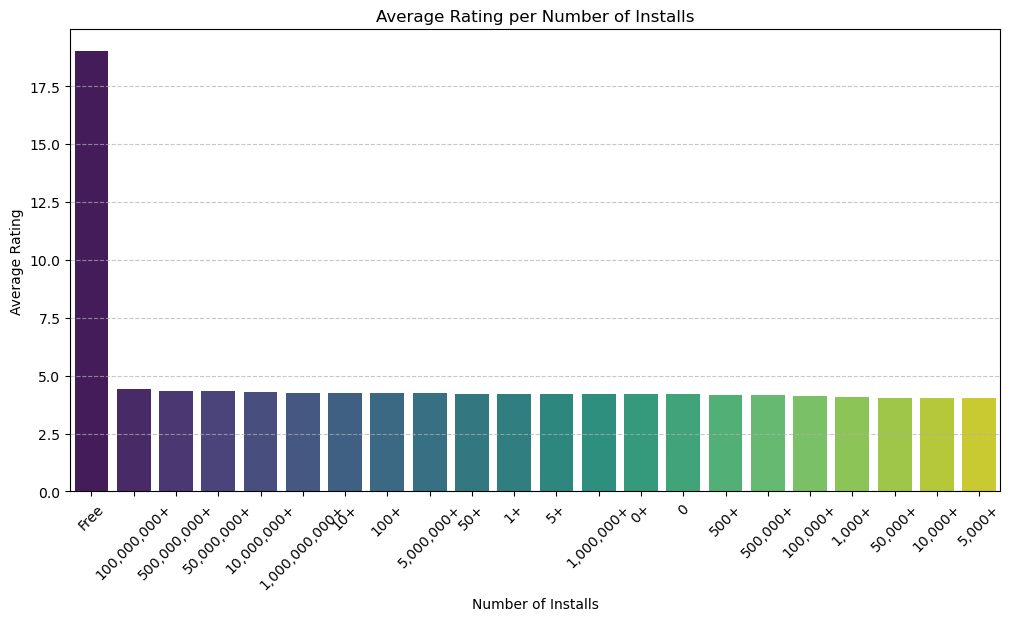

In [836]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_download['Installs'], y=avg_rating_per_download['Rating'], palette='viridis')

# Customize the chart
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.title('Average Rating per Number of Installs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ***Insights***

High Downloads ≠ High Ratings:
* A 1B+ downloaded app has a 4.26 rating, lower than some smaller apps.
* A 100M+ downloaded app has a 4.41 rating, showing strong user satisfaction.
* A 50M+ downloaded app (4.35 rating) surpasses the 1B+ downloaded app.

Small Apps Can Have Competitive Ratings:
* A 10+ download app has the same 4.26 rating as the 1B+ downloaded app.
* A 1+ download app has a 4.22 rating, reflecting early user approval.

Minimal Download Apps Still Perform Well
* 0+ download app has a 4.19 rating, possibly pre-release.
* 5+ download app holds a 4.22 rating.


Mid-Range Download Apps Often Have Lower Ratings
* Apps with 10K+ (4.04 rating) and 50K+ downloads (4.05 rating) show weaker user satisfaction.
* 1K+ downloaded app has a 4.09 rating, lower than many others.

Takeaways
* High downloads don't guarantee higher ratings—some smaller apps outperform big ones.
* Early-stage apps tend to have high ratings, which may decline as more users review them.
* Ratings for popular apps typically stabilize in the 4.2–4.4 range, making exceptionally high ratings rare.

# ***Insights help creating a positive business impact?***

Business Impact Insights
* Quality Over Quantity – Focus on user satisfaction, not just downloads.
* Leverage Early Ratings – Use high initial ratings in marketing.
* Maintain Ratings Growth – Regular updates & user engagement are key.
* Turn Small Users into Advocates – Encourage positive reviews early.
* Fix Mid-Range Rating Drops – Address common issues before scaling.
* Benchmark Against Competitors – Aim for a 4.2–4.4 rating range.
* Use Ratings as Growth Signals – High-rated small apps have potential.

Action Plan
* Prioritize user experience.
* Promote early positive reviews.
* Keep updates & support active.
* Encourage organic advocacy.
* Fix mid-range download issues.
* Study high-rated competitors.
* Scale marketing for high-rated apps.

# ***4)Most Common Positive and Negative Sentiments by Category***

In [853]:
print(userReview_data.columns.tolist())

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


### Merge to table to get Category column in userReview_data


In [857]:
merged_data = playstore_data.merge(userReview_data, on='App', how='inner')

# Selecting only the required columns
final_userReview_data = merged_data[['App', 'Category', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# Display the result
final_userReview_data.head()

,App,Category,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,I love colors inspyering,Positive,0.500,0.600000


In [861]:
positive_reviews = final_userReview_data[final_userReview_data['Sentiment'] == 'Positive']
negative_reviews = final_userReview_data[final_userReview_data['Sentiment'] == 'Negative']

# Count the number of positive and negative reviews per category
positive_counts = positive_reviews['Category'].value_counts()
negative_counts = negative_reviews['Category'].value_counts()

# Combine the data into a new DataFrame
sentiment_counts = pd.DataFrame({'Positive': positive_counts, 'Negative': negative_counts}).fillna(0)

print(sentiment_counts)

                     Positive  Negative
Category                               
ART_AND_DESIGN            259        61
AUTO_AND_VEHICLES         236        17
BEAUTY                    185        65
BOOKS_AND_REFERENCE       519       130
BUSINESS                  753       206
COMICS                     72         2
COMMUNICATION            1212       332
DATING                   1556       545
EDUCATION                 891       140
ENTERTAINMENT             865       334
EVENTS                    125        16
FAMILY                   3564      1452
FINANCE                  1190       410
FOOD_AND_DRINK            531        97
GAME                     9980      6542
HEALTH_AND_FITNESS       2172       369
HOUSE_AND_HOME            361        93
LIBRARIES_AND_DEMO        238        51
LIFESTYLE                 700       195
MAPS_AND_NAVIGATION       129        27
MEDICAL                  1094       237
NEWS_AND_MAGAZINES        834       368
PARENTING                 185        23


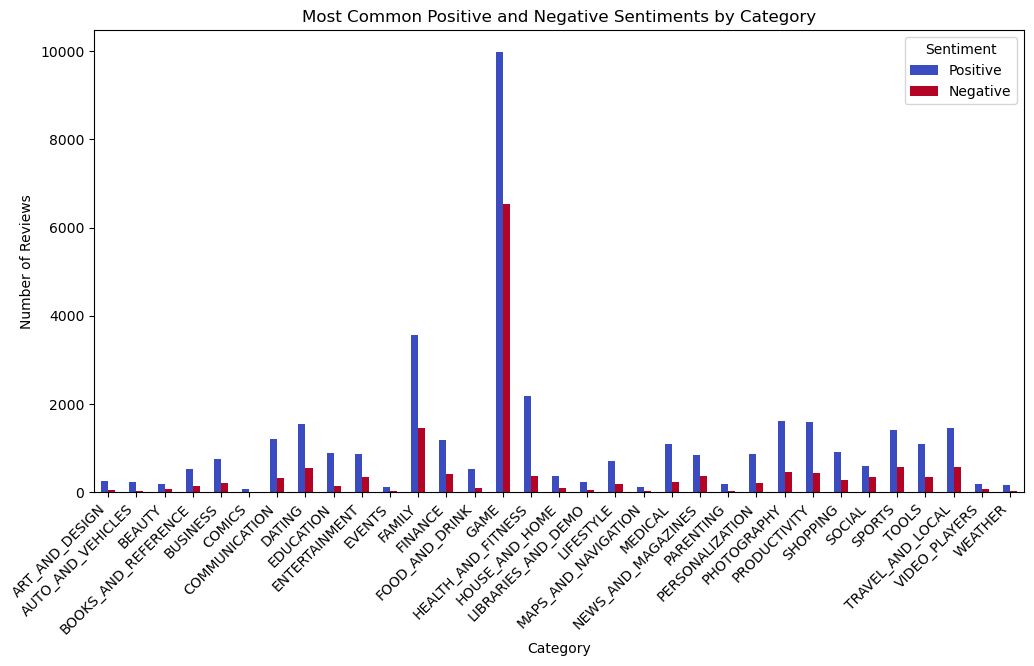

In [863]:
# Plot the results
sentiment_counts.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Most Common Positive and Negative Sentiments by Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")
plt.show()

# ***Insights***

High Engagement (Both Positive & Negative)
* Games: Most reviews (16,522), but also highest negative feedback (6,542) due to performance issues, bugs, or in-app purchases.
* Family Apps: 5,016 reviews, with 1,452 negative—potential concerns about usability and child-friendliness.
* Dating Apps: 2,101 reviews, 545 negative—user dissatisfaction with matches, subscriptions, or functionality.
* Finance Apps: 1,600 reviews, 410 negative—issues with security, transactions, or trust.

High Positive & Low Negative Feedback
* Comics, Events, Auto & Vehicles, Parenting: High satisfaction and low complaints, suggesting strong user experience.

High Negative Feedback Relative to Total Reviews
* Social (37% negative), Sports (29%), News & Magazines: Concerns over privacy, content moderation, ads, or app performance.

Productivity & Utility Apps
* Productivity (1,590 positive, 434 negative) & Tools (1,090 positive, 347 negative): Reliability and usability issues contribute to moderate negativity.

Conclusion:
* Entertainment, Gaming, and Social Apps: High engagement but also significant dissatisfaction due to technical and monetization issues.
* Finance, Productivity, and Utility Apps: Strong usage but moderate concerns about usability and security.
* Niche Apps (Comics, Auto, Parenting, Events): Lower negative feedback, indicating high user satisfaction.

# ***Insights help creating a positive business impact?***

1)Enhance User Experience:
* Games & Social Apps: Fix bugs, optimize purchases, improve moderation, and boost engagement.
* Family & Dating Apps: Ensure child-friendly content and improve transparency in matchmaking and subscriptions.
* Finance Apps: Strengthen security, transaction reliability, and customer support.

2)Leverage Positive Feedback:
* Focus on user-favorite features, increase marketing, and offer premium add-ons in Comics, Events, Auto & Vehicles, and Parenting apps.

3)Reduce Negative Feedback in Content Apps:
* Minimize excessive ads, ensure content accuracy, and enhance performance, especially for News, Magazines, and Sports apps.

4)Optimize Productivity & Utility Apps:
* Improve reliability, seamless integration, AI automation, and user support.

5)Implement Growth Strategies:
* User-Centric Development: Update apps based on feedback.
* Loyalty & Retention Programs: Reward active users.
* Partnerships: Collaborate with trusted brands in finance, auto, and parenting.
* Data-Driven Marketing: Address complaints and highlight strengths in promotions.

# ***5)Is there a relationship between the number of reviews and app rating***

In [879]:
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')

# Group by 'Category' and calculate Total Review (in millions) and Average Rating
Rating_vs_Reviews = playstore_data.groupby('Category').agg(
    Total_Review=('Reviews', lambda x: x.sum() / 1_000_000),  # Convert to millions
    Average_Rating=('Rating', 'mean')
).reset_index()

# Round Total_Review to 2 decimal places
Rating_vs_Reviews['Total_Review'] = Rating_vs_Reviews['Total_Review'].apply(lambda x: f"{x:.2f}M")


# Display the result
print(Rating_vs_Reviews.head())

              Category Total_Review  Average_Rating
0                  1.9        0.00M       19.000000
1       ART_AND_DESIGN        1.71M        4.358065
2    AUTO_AND_VEHICLES        1.16M        4.190411
3               BEAUTY        0.40M        4.278571
4  BOOKS_AND_REFERENCE       21.87M        4.347458


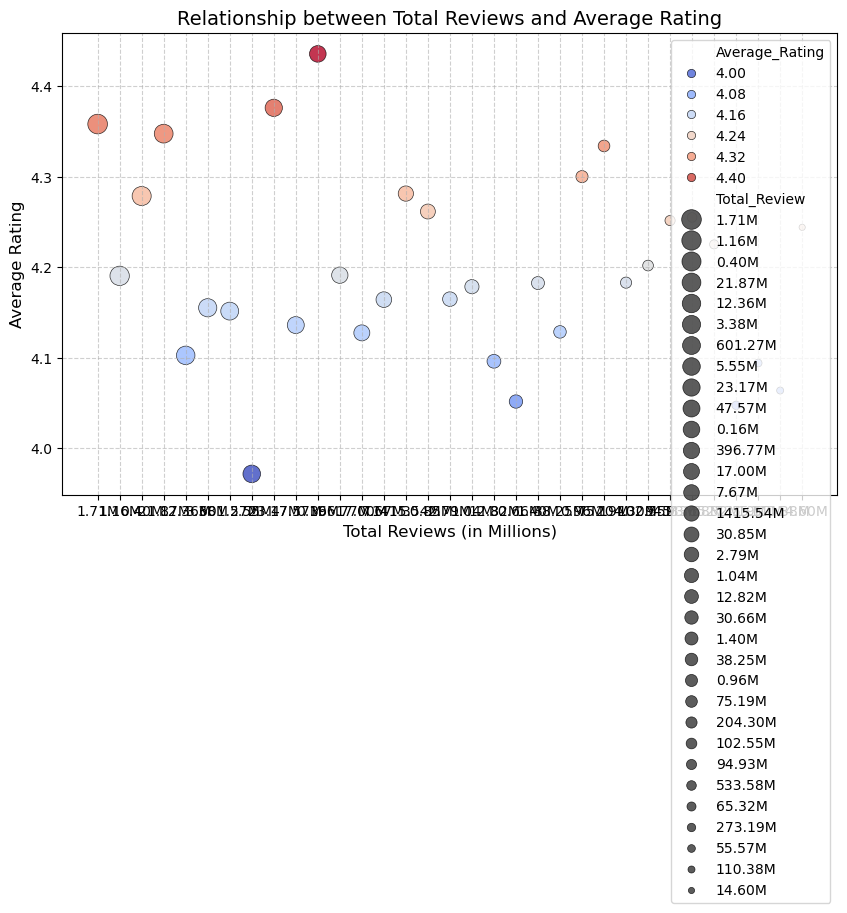

In [556]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Rating_vs_Reviews, x="Total_Review", y="Average_Rating", size="Total_Review", sizes=(20, 200), hue="Average_Rating", palette="coolwarm", edgecolor='black', alpha=0.8)

# Formatting the chart
plt.xlabel("Total Reviews (in Millions)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Relationship between Total Reviews and Average Rating", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

Answer Here.

# ***Insights***

* No Strong Correlation Between Total Reviews and Average Rating
* Highly Reviewed Apps Tend to Have Mid-Range Ratings
* Low-Reviewed Apps Show Greater Rating Variability
* Stability in Ratings for Popular Apps

# ***Insights help creating a positive business impact?***

* For New Apps: Encouraging initial positive reviews is crucial, as early ratings tend to fluctuate more and can impact future downloads.
* For Popular Apps: Maintaining quality and addressing user concerns is key, as a large number of reviews makes it harder to significantly change the average rating.
* For Developers: Apps with a mid-range number of reviews still have the potential to boost their ratings through customer engagement and improvements.

# ***6)Category-wise Average Sentiment Polarity***

In [954]:
df_merged = pd.merge(playstore_data, userReview_data, on="App", how="inner")


# Calculate category-wise average Sentiment_Polarity
category_avg_sentiment = category_avg_sentiment.sort_values(by="Sentiment_Polarity", ascending=False)

# Display the result
print(category_avg_sentiment)

               Category  Sentiment_Polarity
5                COMICS            0.457056
10               EVENTS            0.377933
1     AUTO_AND_VEHICLES            0.348683
22            PARENTING            0.318880
32              WEATHER            0.282033
15   HEALTH_AND_FITNESS            0.277682
13       FOOD_AND_DRINK            0.270350
8             EDUCATION            0.267221
19  MAPS_AND_NAVIGATION            0.267218
23      PERSONALIZATION            0.253983
17   LIBRARIES_AND_DEMO            0.240771
20              MEDICAL            0.239214
16       HOUSE_AND_HOME            0.238510
0        ART_AND_DESIGN            0.234735
4              BUSINESS            0.223084
3   BOOKS_AND_REFERENCE            0.220696
18            LIFESTYLE            0.215604
24          PHOTOGRAPHY            0.214572
29                TOOLS            0.209034
26             SHOPPING            0.196981
2                BEAUTY            0.193360
6         COMMUNICATION         

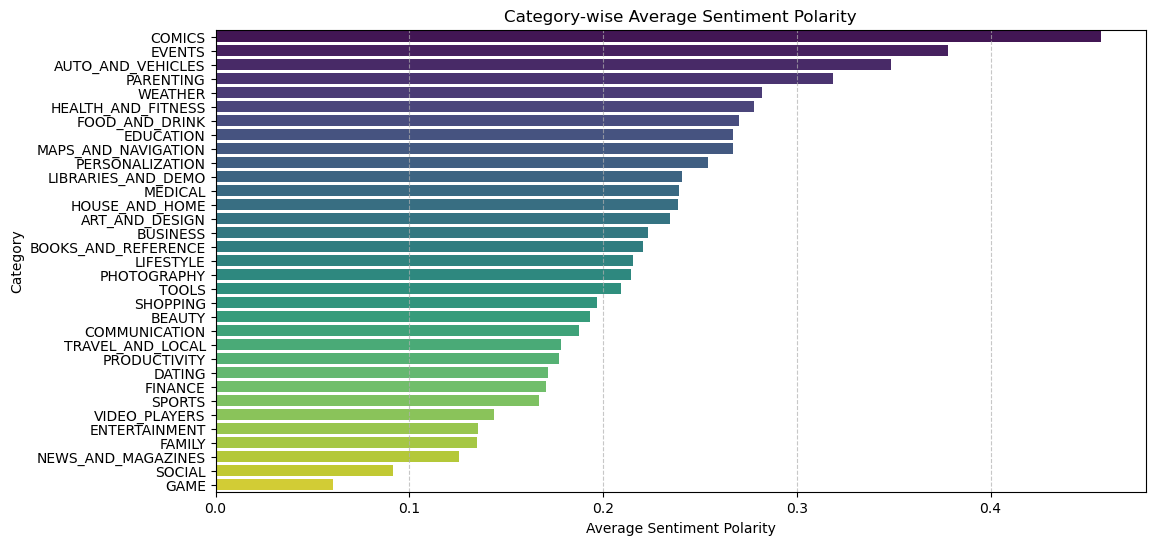

In [896]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Sentiment_Polarity", y="Category", data=category_avg_sentiment, palette="viridis")

# Customize the chart
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Category")
plt.title("Category-wise Average Sentiment Polarity")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Sentiment Polarity:It measures how positive or negative a review is.
* It ranges from -1 (negative) to +1 (positive).
* A high polarity (close to 1) indicates a positive sentiment.
* A low polarity (close to -1) indicates a negative sentiment.
* A neutral polarity (~0) suggests a mixed or neutral review.

# ***Insights***

Summary of Sentiment Polarity Insights:
* Highly Positive Sentiment: Comics (0.457), Events (0.378), and Auto & Vehicles (0.349) show strong positive engagement. Parenting, Weather, Health & Fitness, and Food & Drink also score high.
* Moderate Sentiment: Business (0.223), Books & Reference (0.221), Lifestyle (0.216), and Finance (0.170) indicate neutral-to-slightly positive experiences.
* Lowest Sentiment: Social (0.091), News & Magazines (0.125), and Games (0.061) score the lowest, likely due to polarizing discussions, criticism, or frustration.
* Key Insights: Fun and engaging categories show high sentiment, while practical topics remain neutral. Social media, news, and gaming tend to attract more criticism or mixed reactions.

# ***Insights help creating a positive business impact?***

Optimizing Engagement with Sentiment Data:
* High-Engagement Categories: Businesses in Comics, Events, Auto, Parenting, Health, and Food can boost engagement through promotions, community-building, and storytelling.
* Neutral Categories: Finance, Business, Books, and Lifestyle can enhance user connection with interactive content and simplified services.
* Low Sentiment Categories: Social, News, and Games should address negative feedback and improve user experience.
* Content & Product Strategy: Focus on positive sentiment areas for brand-building and refine products/services based on sentiment data to improve trust and retention.

# ***6)Category-wise Average Sentiment Subjectivity***

In [911]:
df_merged_subjectivity = pd.merge(playstore_data, userReview_data, on="App", how="inner")

# Calculate category-wise average Sentiment Subjectivity
category_avg_subjectivity = df_merged_subjectivity.groupby("Category")["Sentiment_Subjectivity"].mean().reset_index()

category_avg_subjectivity = category_avg_subjectivity.sort_values(by="Sentiment_Subjectivity", ascending=False)

# Display the result
print(category_avg_subjectivity)

               Category  Sentiment_Subjectivity
5                COMICS                0.579079
10               EVENTS                0.576808
0        ART_AND_DESIGN                0.537098
1     AUTO_AND_VEHICLES                0.529918
17   LIBRARIES_AND_DEMO                0.525975
23      PERSONALIZATION                0.522899
13       FOOD_AND_DRINK                0.522017
24          PHOTOGRAPHY                0.505735
15   HEALTH_AND_FITNESS                0.505498
11               FAMILY                0.505465
7                DATING                0.504210
26             SHOPPING                0.503593
22            PARENTING                0.503562
14                 GAME                0.500932
6         COMMUNICATION                0.500909
2                BEAUTY                0.494510
20              MEDICAL                0.493457
28               SPORTS                0.493223
30     TRAVEL_AND_LOCAL                0.491078
32              WEATHER                0

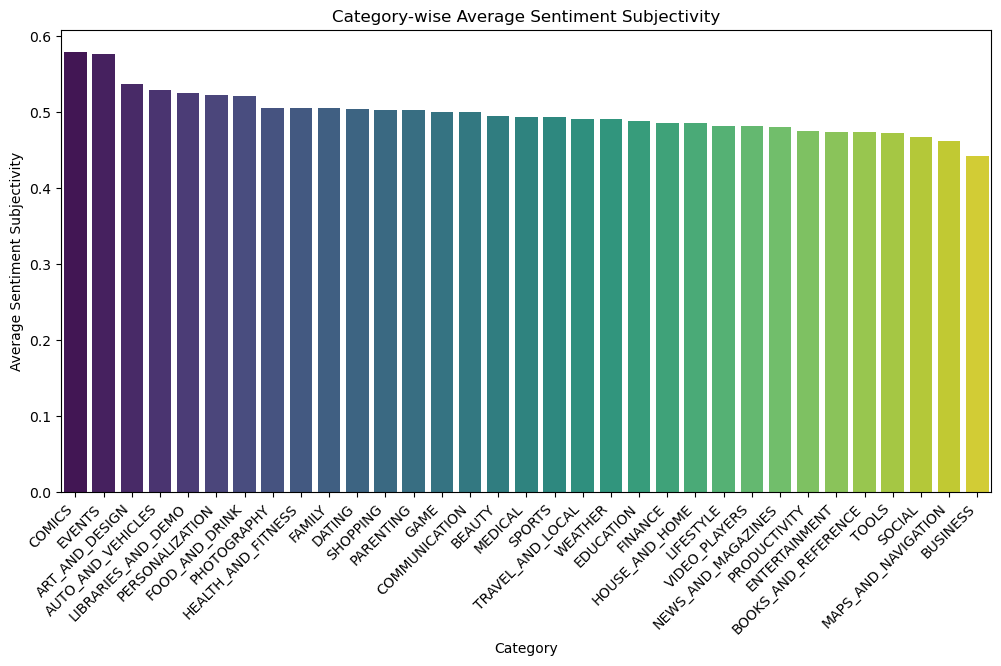

In [722]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_subjectivity["Category"], y=category_avg_subjectivity["Sentiment_Subjectivity"], palette="viridis")

# Customize the chart
plt.xlabel("Category")
plt.ylabel("Average Sentiment Subjectivity")
plt.title("Category-wise Average Sentiment Subjectivity")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# ***Insights***

Most Subjective Categories:
* COMICS (0.5791) – Highest subjectivity due to personal and emotional opinions.
* EVENTS (0.5768) – Experiences vary widely, making opinions more personal.
* ART_AND_DESIGN (0.5371) – Naturally subjective as art is based on personal interpretation.

Moderately Subjective Categories:
* FOOD_AND_DRINK (0.5220), PHOTOGRAPHY (0.5057), DATING (0.5042) – Reflect personal preferences and experiences.
* COMMUNICATION (0.5009), GAMES (0.5009) – Close to neutral but slightly subjective.

More Objective Categories:
* FINANCE (0.4859), MEDICAL (0.4935) – Discussions are fact-based and data-driven.
* TOOLS (0.4722), PRODUCTIVITY (0.4750) – More functional, with less opinion-based content.

Least Subjective Categories:
* MAPS_AND_NAVIGATION (0.4628), BUSINESS (0.4422) – Lowest subjectivity due to reliance on objective data.

Key Takeaways:
* Categories related to art, events, and entertainment are more subjective.
* Practical and data-driven fields (finance, business, navigation) tend to be more objective.
* Communication, education, and shopping fall in the middle, balancing both subjective and objective elements.

# ***Insights help creating a positive business impact?***

Business Insights from Sentiment Subjectivity Analysis
Sentiment Subjectivity measures how opinion-based or factual a review is:

* High Subjectivity (>0.5): Emotion-driven, personal reviews.
* Low Subjectivity (<0.5): Fact-based, neutral reviews.

Key Insights & Business Actions
* High Subjectivity Categories (Comics, Events, Art, Auto, Food & Drink, etc.)
* Insights: User opinions, emotions, and experiences drive engagement.
* Actions: Leverage user-generated content, emotional marketing, strong customer support, and community building.

* Moderate Subjectivity Categories (Games, Finance, Shopping, Travel, etc.)
* Insights: Balanced mix of functional and opinion-based reviews.
* Actions: Improve usability, showcase real-world benefits, maintain transparency.

* Low Subjectivity Categories (News, Productivity, Business, Tools, etc.)
* Insights: Users value reliability, accuracy, and efficiency.
* Actions: Focus on performance, fact-checked content, security, and data-driven marketing.

Strategic Business Impact:
* High Subjectivity → Build emotional connections through engagement & storytelling.
* Moderate Subjectivity → Balance emotion & functionality while improving usability.
* Low Subjectivity → Prioritize credibility, reliability, and efficiency.

# ***Conclusion***

Top-Rated App Categories:
* Events, Education, and Creative Apps (e.g., Art & Design, Books & Reference) receive the highest ratings, indicating strong user satisfaction.
* Utility and Productivity Apps (e.g., Finance, Business, Tools) tend to have slightly lower ratings due to high user expectations and usability concerns.


Ratings vs. Downloads:
* High downloads do not guarantee high ratings—some smaller apps outperform large-scale ones.
* Early-stage apps often have high ratings, which may decline as user feedback increases.
* Ratings for popular apps stabilize in the 4.2–4.4 range, with extremely high ratings being rare.

Engagement & User Feedback:
* Gaming, Social, and Entertainment Apps have high engagement but also high negative feedback, often due to technical issues, monetization, or privacy concerns.
* Finance, Productivity, and Utility Apps are widely used but face trust, usability, and reliability challenges.
* Niche Categories (e.g., Comics, Events, Auto, Parenting) receive high satisfaction with minimal complaints.

Sentiment & Subjectivity Trends:
* Highly Positive Sentiment: Comics, Events, Auto & Vehicles, and Parenting apps foster strong user engagement.
* Lowest Sentiment Scores: Social, News & Magazines, and Gaming apps attract more polarized feedback.

Subjectivity vs. Objectivity:
* Creative and experience-driven apps (e.g., Art & Design, Events, Comics) are highly subjective.
* Functional categories (e.g., Finance, Business, Productivity, Navigation) are more objective.

# ***How App Developers Can Optimize Performance, Enhance Engagement, and Make Informed Decisions***

Optimize App Performance & User Experience
* Improve Stability & Speed: Fix bugs, crashes, and lag to reduce negative reviews.
* Enhance UI/UX: Create intuitive designs, simplify navigation, and personalize user recommendations.
* Reduce Battery & Data Usage: Optimize background processes and offer offline functionality where possible.

Increase User Engagement & Retention
* Better Onboarding: Use interactive tutorials and gamification to engage users.
* Personalization & AI: Leverage AI-driven recommendations for customized experiences.
* Encourage Positive Reviews: Request feedback proactively and address complaints promptly.
* Monetization Balance: Avoid intrusive ads and excessive in-app purchases while offering valuable premium options.

Make Data-Driven Business Decisions
* Analyze Ratings & Reviews: Identify trends to improve features and usability.
* A/B Testing: Experiment with pricing, UI changes, and notifications to boost engagement.
* Target the Right Audience: Tailor features and marketing to different app categories.
* Monitor Sentiment & Adapt: Address user concerns to maintain trust and satisfaction.

Key Takeaways for Success
* Prioritize performance and user experience.
* Use AI and personalization to drive engagement.
* Optimize monetization without frustrating users.
* Make informed decisions based on user feedback.
* Align marketing with audience expectations.
By implementing these strategies, developers can enhance app quality, increase engagement, and achieve long-term success.
